In [84]:
import numpy as np
import matplotlib.pyplot as plt 

from src.dataset import CAMELS_2D_dataset
from src.model import vdm_model,networks

import importlib
importlib.reload(CAMELS_2D_dataset)
importlib.reload(vdm_model)
importlib.reload(networks)

<module 'src.model.networks' from '/n/home12/cfpark00/Diffusion/vdm4cdm_dev/vdm4cdm/src/model/networks.py'>

In [85]:
#model
input_channels=1
conditioning_channels = 0
conditioning_values = 0
gamma_min = -13.3
gamma_max = 13.3
embedding_dim = 48
norm_groups = 8
n_blocks = 4
add_attention = True
n_attention_heads = 4
dropout_prob = 0.1

#dataset
batch_size = 12
num_workers = 20

score_model=networks.UNet4VDM(
    input_channels=1,
    conditioning_channels=conditioning_channels,
    conditioning_values=conditioning_values,
    gamma_min=gamma_min,
    gamma_max=gamma_max,
    embedding_dim=embedding_dim,
    norm_groups=norm_groups,
    n_blocks=n_blocks,
    add_attention=add_attention,
    n_attention_heads=n_attention_heads,
    dropout_prob=dropout_prob,
    #attention_everywhere = False,
    )
vdm=vdm_model.LightVDM(score_model=score_model)
vdm=vdm.to('cuda')

In [86]:
samples=vdm.draw_samples(batch_size=10,n_sampling_steps=250,verbose=True)
samples.shape

sampling: 100%|██████████| 250/250 [00:08<00:00, 30.24it/s]


torch.Size([10, 1, 256, 256])

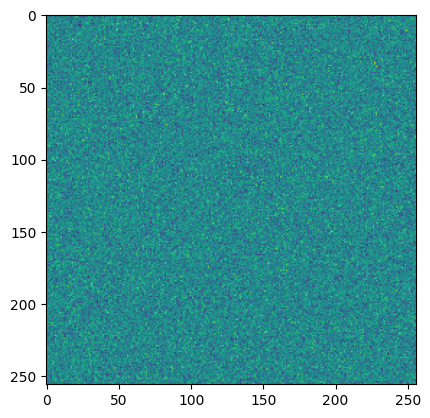

In [87]:
plt.imshow(samples[0,0].detach().cpu().numpy())

Test Dataset

In [9]:
dm=CAMELS_2D_dataset.get_dataset(channel_names=[
    "Mcdm",
    "Mstar",
    "B",
    "T",
    "Z",
    "Mgas",
    "MgFe",
    "HI",
    "P",
    "ne"
])
dl=dm.train_dataloader()

[0, 1, 1e-15, 0, 1e-09, 0, 0, 0, 0, 1e-08]
[10.971016779411217, 0.11827025731173749, -12.04300638696815, 4.775720473718215, -5.974338585814151, 10.401774406119543, 0.7003930849037634, 4.76754097770079, 3.901135750866593, -6.039242691961698]
[0.5087284357004165, 1.0741983915022257, 1.984598099344707, 0.815752282808835, 2.3712616118980567, 0.49251701692155164, 0.07197104282785632, 1.0091554313314908, 1.19730507260193, 0.4845426108432643]


In [15]:
data=next(iter(dl))

In [16]:
fields=data[0]
len(fields),dm.channel_names

(10, ['Mcdm', 'Mstar', 'B', 'T', 'Z', 'Mgas', 'MgFe', 'HI', 'P', 'ne'])

In [17]:
data[1],data[1].shape

(tensor([[0.4398, 0.9150, 0.3015, 1.5011, 0.9119, 0.7873]]),
 torch.Size([1, 6]))

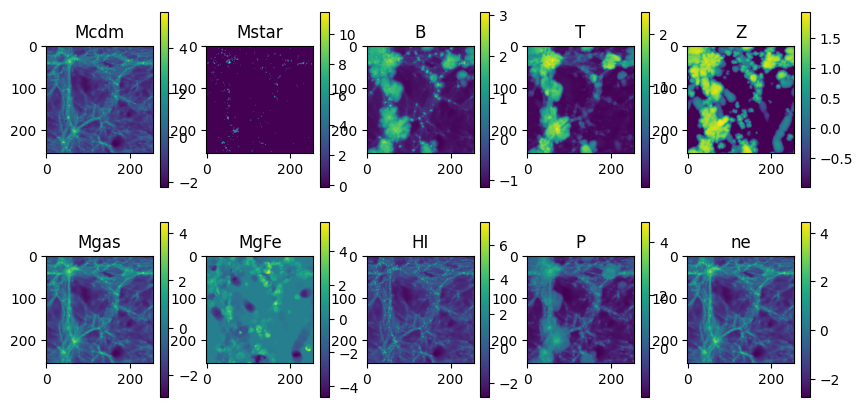

In [18]:
plt.figure(figsize=(10,5))
for i, channel_name in enumerate(dm.channel_names):
    plt.subplot(2,5,i+1)
    plt.imshow(fields[i][0,0])
    plt.colorbar()
    plt.title(channel_name)

In [19]:
for i, channel_name in enumerate(dm.channel_names):
    print(channel_name, fields[i].mean(), fields[i].std(), fields[i].min(), fields[i].max())

Mcdm tensor(-0.2743) tensor(0.9457) tensor(-2.2366) tensor(5.6128)
Mstar tensor(-0.0396) tensor(0.8012) tensor(-0.1101) tensor(11.4486)
B tensor(-0.2167) tensor(0.9849) tensor(-1.1636) tensor(3.0678)
T tensor(-0.2053) tensor(0.8845) tensor(-0.9408) tensor(2.4150)
Z tensor(-0.0086) tensor(0.9576) tensor(-0.9859) tensor(1.9309)
Mgas tensor(-0.8403) tensor(1.0079) tensor(-2.9220) tensor(4.4638)
MgFe tensor(-0.1850) tensor(1.0372) tensor(-4.6278) tensor(5.7045)
HI tensor(-0.7338) tensor(1.0308) tensor(-2.8351) tensor(7.3162)
P tensor(-0.5254) tensor(0.9774) tensor(-1.8520) tensor(4.7524)
ne tensor(-0.8295) tensor(0.9930) tensor(-2.7456) tensor(4.4326)


In [46]:
fields[0]

tensor([[[[27.4067, 27.1365, 27.1466,  ..., 27.5774, 27.3413, 27.4900],
          [27.2466, 27.1247, 27.0463,  ..., 28.0230, 27.6476, 27.5748],
          [27.1837, 27.2210, 27.1005,  ..., 27.8295, 27.6636, 27.5010],
          ...,
          [27.8384, 27.3996, 27.2530,  ..., 27.9239, 27.7087, 28.1691],
          [27.3445, 27.4801, 27.3511,  ..., 27.4191, 27.3671, 27.2807],
          [27.3180, 27.2499, 27.1333,  ..., 27.1695, 27.1170, 27.2428]]]])

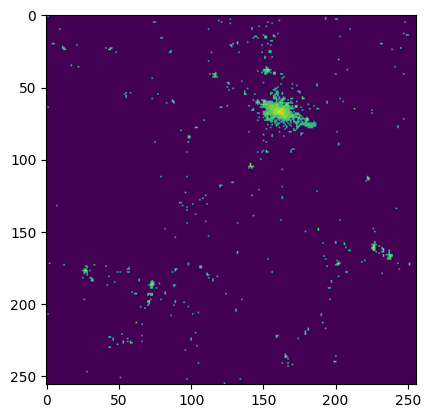

In [23]:
plt.imshow(Mstar[0,0])

In [ ]:
plt.im

In [ ]:
x.shape, y.shape